# Pruebas RandomForest

En este notebook se realizan pruebas con RandomForest. El set de training usado se genera desde `lucho/generar_set_test`

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv')

In [10]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [3]:
TEST_SIZE_PERCENT = 0.1
RANDOM_SEED = 12

In [4]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [11]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [19]:
clasificador = RandomForestClassifier(
        n_estimators=10, 
        criterion='entropy', 
        max_features='sqrt', 
        min_samples_split=100, 
        n_jobs=-1, 
        random_state=RANDOM_SEED, 
        verbose=10
    )

In [20]:
clasificador.fit(X_train, y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   15.4s remaining:   15.4s


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   16.6s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=12, verbose=10, warm_start=False)

In [21]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [22]:
roc_auc_score(y_test, y_test_predictd)

0.9924523119382164

In [23]:
clasificador.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


0.9597533333333333

In [24]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [25]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

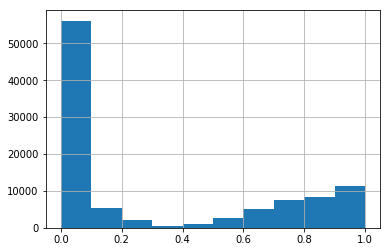

In [26]:
kaggle_out['sepostulo'].hist()

In [27]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-36.csv', index=False)